In [6]:
import matplotlib.pyplot as plt
#from matplotlib.patches import Patch
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import pandas as pd

In [38]:
tectonic_events = pd.read_csv('./Data/tectonic_events.csv')
timescale = pd.read_csv('./Data/ages.csv')

In [39]:
timescale

,era,b_age,t_age,abbr,color
0,Paleoproterozoic,2500,1600,Paleoprot.,white
1,Mesoproterozoic,1600,1000,Mesoprot.,white
2,Neoproterozoic,1000,539,Neoprot.,white
3,Phanerozoic,539,0,Phan.,white


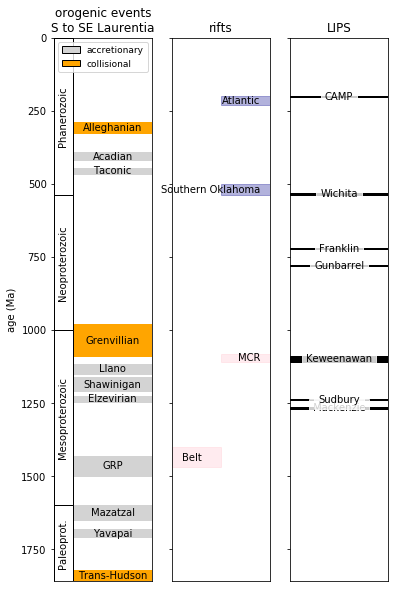

In [43]:
fig = plt.figure(figsize=(6,10))

ax_orogeny = fig.add_subplot(1, 3, 1)

for event in tectonic_events.index:
    if tectonic_events['event_type'][event] == 'orogeny_collisional':
        start = tectonic_events['start'][event]
        end = tectonic_events['end'][event]
        name = tectonic_events['name'][event]
        rect = plt.Rectangle((0.2, end), 1, start-end, color='orange')
        ax_orogeny.add_patch(rect)
        plt.text(0.6,(start+end)/2,name,
                 verticalalignment='center',horizontalalignment='center')
        
    elif tectonic_events['event_type'][event] == 'orogeny_accretionary':
        start = tectonic_events['start'][event]
        end = tectonic_events['end'][event]
        name = tectonic_events['name'][event]
        rect = plt.Rectangle((0.2, end), 1, start-end, color='lightgrey')
        ax_orogeny.add_patch(rect)
        plt.text(0.6,(start+end)/2,name,
                 verticalalignment='center',horizontalalignment='center')
        
for era in timescale.index: 
    start = timescale['b_age'][era]
    end = timescale['t_age'][era]
    rect = plt.Rectangle((0, end), 0.2, start-end, facecolor='white',edgecolor='black',linestyle='-')
    ax_orogeny.add_patch(rect)
    if timescale['abbr'][era] == 'Paleoprot.':
        name = timescale['abbr'][era]
        plt.text(0.1,(1860+end)/2,name,rotation=90,
                 verticalalignment='center',horizontalalignment='center')
    else:
        name = timescale['era'][era]
        plt.text(0.1,(start+end)/2,name,rotation=90,
             verticalalignment='center',horizontalalignment='center')

plt.title('orogenic events\nS to SE Laurentia')
plt.ylim(1860,0)
plt.ylabel('age (Ma)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

legend_elements = [Patch(facecolor='lightgrey', edgecolor='k',
                         label='accretionary'),
                   Patch(facecolor='orange', edgecolor='k',
                         label='collisional')]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 9)

ax_rift = fig.add_subplot(1, 3, 2)

for event in tectonic_events.index:
    
    start = tectonic_events['start'][event]
    end = tectonic_events['end'][event]
    name = tectonic_events['name'][event]
    
    if tectonic_events['location'][event] == 'west':
        start_x = 0
        plt.text(0.1,(start+end)/2,name,
                 verticalalignment='center',horizontalalignment='left')
    
    elif tectonic_events['location'][event] == 'east':
        start_x = 0.5
        plt.text(0.9,(start+end)/2,name,
                 verticalalignment='center',horizontalalignment='right')
    
    if tectonic_events['event_type'][event] == 'rift_intracratonic':
        rect = plt.Rectangle((start_x, end), 0.5, start-end, color='pink', alpha=0.3)
        ax_rift.add_patch(rect)

    elif tectonic_events['event_type'][event] == 'rift':
        rect = plt.Rectangle((start_x, end), 0.5, start-end, color='lightblue', alpha=0.3)
        ax_rift.add_patch(rect)
        
    elif tectonic_events['event_type'][event] == 'rift_passive_margin':
        rect = plt.Rectangle((start_x, end), 0.5, start-end, color='lightblue', alpha=0.3)
        ax_rift.add_patch(rect)
        
             
plt.title('rifts')
plt.ylim(1860,0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the left edge are off
    labelleft=False) # labels along the bottom edge are off

ax_LIP = fig.add_subplot(1, 3, 3)

for event in tectonic_events.index:
    if tectonic_events['event_type'][event] == 'LIP':
        start = tectonic_events['start'][event]
        end = tectonic_events['end'][event]
        name = tectonic_events['name'][event]
        rect = plt.Rectangle((0, end), 1, start-end, color='k')
        ax_LIP.add_patch(rect)
        text = plt.text(0.5,(start+end)/2,name,
                 verticalalignment='center',horizontalalignment='center')
        text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.title('LIPS')
plt.ylim(1860,0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the left edge are off
    labelleft=False) # labels along the bottom edge are off

plt.savefig('./Figures/Tectonic_history.pdf', bbox_inches = 'tight', pad_inches = 0)